<a href="https://colab.research.google.com/github/Mahrokh-Eb/Machine-Learning-With-Python/blob/master/1_1_1_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
#!pip3 install bcolz 

     |████████████████████████████████| 1.5 MB 5.2 MB/s 
  Created wheel for bcolz: filename=bcolz-1.2.1-cp37-cp37m-linux_x86_64.whl size=2648827 sha256=9d13b0a4c0808d29431fe17b7dcbf7dc30ce09f7ded4d2952ec7a9e649c77156
  Stored in directory: /root/.cache/pip/wheels/2c/35/ca/9d914de345914e2446ea285170329f771b8abba2a00f7650bd
Successfully built bcolz


In [65]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [121]:
%cd /content/drive/MyDrive/numpy/cifar-10-batches-py

/content/drive/MyDrive/numpy/cifar-10-batches-py


In [122]:
import numpy as np

In [123]:
!python --version

Python 3.7.12


In [124]:
print(np.__version__)

1.19.5


In [125]:
#dir(np)

In [126]:
#help(np.where)

In [127]:
#np.where?

In [128]:
x = np.array([[1,2,3], [4,5,6], [7,8,9]])

In [129]:
print(x)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [130]:
print(np.where(x>5, x, 0))

[[0 0 0]
 [0 0 6]
 [7 8 9]]


In [131]:
print(np.array([1,2,3]))

[1 2 3]


In [132]:
print(type)

<class 'type'>


In [133]:
print(type(x))

<class 'numpy.ndarray'>


In [134]:
A = np.array([[1,2,3], [4,5,6]])

In [135]:
print(A)

[[1 2 3]
 [4 5 6]]


In [136]:
print(type(A))

<class 'numpy.ndarray'>


In [137]:
print(A.shape)

(2, 3)


In [138]:
print(x.shape)

(3, 3)


In [139]:
print(x.shape[0])

3


In [140]:
 print(np.reshape(A, (3,2)))

[[1 2]
 [3 4]
 [5 6]]


## **Reshape a matrix from column to row vector**

In [141]:
print(np.reshape(A,(1, -1)))

[[1 2 3 4 5 6]]


In [142]:
print(np.reshape(A, (-1, 1)))

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [143]:
 print(x)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


# Reshape to two-dimenssion

In [144]:
y = np.array([1,2,3])

In [145]:
print(y[ None, :])

[[1 2 3]]


In [146]:
print(y[:, None])

[[1]
 [2]
 [3]]


In [147]:
print(y[:, np.newaxis])

[[1]
 [2]
 [3]]


# Array dimenssion

In [148]:
print(x.ndim)

2


In [149]:
print(y.ndim)

1


# Data type

In [150]:
print(x.dtype)

int64


In [151]:
c= np.array([1,2,3], dtype=np.float32)

In [152]:
print(c)

[1 2 3]


In [153]:
print(np.arange(1, 20, step=2))

[1 3 5 7 9 11 13 15 17 19]


In [154]:
#np.arange?

In [155]:
print(np.linspace(1,2, num=5))

[1 1 1 1 2]


In [156]:
print(np.logspace(2, 5, 10, base=2))

[4 5 6 8 10 12 16 20 25 32]


In [157]:
np.set_printoptions(formatter={'all':lambda x: '%d' %x})

In [158]:
print(np.logspace(2, 5, 10, base=2))

[4 5 6 8 10 12 16 20 25 32]


# Creating specific arrays

In [159]:
print(np.zeros(shape=(2,3), dtype=np.int32))

[[0 0 0]
 [0 0 0]]


In [160]:
print(5 * np.ones(shape=(2,3)))

[[5 5 5]
 [5 5 5]]


In [161]:
print(np.reshape(np.arange(1, 10), (3,3)))

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [162]:
print(np.fliplr(np.eye(4,4)))

[[0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]]


# Create random arrays

In [163]:
print(np.random.randn(3,3))

[[0 0 0]
 [0 -1 0]
 [0 1 2]]


In [164]:
%matplotlib inline
import matplotlib.pyplot as plt

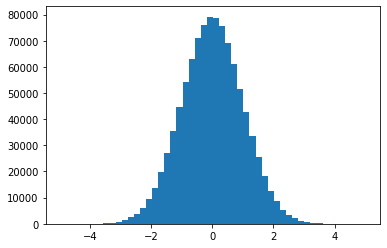

In [165]:
 x = np.random.randn(1000000)
 plt.hist(x, bins=50);

In [166]:
print(np.count_nonzero(np.random.randint(6, size=(2, 4))))

7


In [167]:
#help(np.abs)

In [168]:
x = np.array([1,2,3])
print(x)

[1 2 3]


In [169]:
print(x.shape)

(3,)


In [170]:
y = np.array([[1,2,3], [4,5,6]])
print(y)

[[1 2 3]
 [4 5 6]]


In [171]:
print(np.reshape(y, (1, -1)))

[[1 2 3 4 5 6]]


In [172]:
print(x.size)

3


In [173]:
import keras
import os

In [174]:
import os
import pickle

def load_cifar10_batch(filename):
    """ Load a single batch from CIFAR10 """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='bytes')
        X = datadict[b'data']
        Y = datadict[b'labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype('float')
        Y = np.array(Y)
        return X, Y
    
def load_cifar10(dir):
    """ Load all batches of CIFAR10 """
    # load train batch file
    xs = []
    ys = []
    
    for i in range(1, 6):
        filename = os.path.join(dir, 'data_batch_%d' % i)
        X, Y = load_cifar10_batch(filename)
        xs.append(X)
        ys.append(Y)
        
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    
    # load test batch
    Xte, Yte = load_cifar10_batch(os.path.join(dir, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [176]:
X_train, y_train, X_test, y_test = load_cifar10('/content/drive/MyDrive/numpy/cifar-10-batches-py')

In [177]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000,)


In [180]:
print(y_train[:10])

[6 9 9 4 1 1 2 7 8 3]


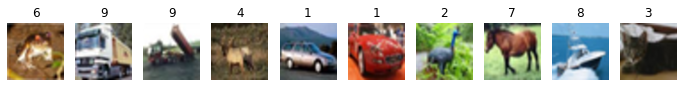

In [178]:
plt.figure(figsize=(12, 2))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i].astype('uint8'), interpolation='spline16')
    plt.title('%d' % y_train[i])
    plt.axis('off')

In [181]:
print(X_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000,)


# Visualize data

In [182]:
 class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'track'] 